In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [2]:
demar = pd.read_csv("DemarDerozan.csv")
kyle = pd.read_csv("KyleLowry.csv")
anunoby = pd.read_csv("OGAnunoby.csv")
serge_ibaka = pd.read_csv("SergeIbaka.csv")
valanciunas = pd.read_csv("Valanciunas.csv")
pascal_siakam = pd.read_csv("PascalSiakam.csv")
jakob_poltl = pd.read_csv("Jakob _Pöltl .csv")
fred_vanvleet = pd.read_csv("Fred_vanvleet.csv")
delon_wright = pd.read_csv("DelonWright.csv")
cj_miles = pd.read_csv("CJMiles.csv")
norman_powell = pd.read_csv("NormanPowell.csv")
lucas_nogueira = pd.read_csv("LucasNogueira.csv")
lorenzo_brown = pd.read_csv("LorenzoBrown.csv")
malcolm_miller = pd.read_csv("MalcolmMiller.csv")
malachi_richardson = pd.read_csv("MalachiRichardson.csv")
alfonzo_mckinnie = pd.read_csv("AlfonzoMcKinnie.csv")
bruno_cabaclo = pd.read_csv("BrunoCabaclo.csv")
nigel_hayes = pd.read_csv("NigelHayes.csv")

In [3]:
demar[['Date','3P']]

,Date,3P
0,2017-10-19,0.0
1,2017-10-21,0.0
2,2017-10-23,2.0
3,2017-10-25,0.0
4,2017-10-27,0.0
...,...,...
87,2018-04-27,0.0
88,2018-05-01,0.0
89,2018-05-03,0.0
90,2018-05-05,0.0


In [6]:
demar.columns

Index(['Rk', 'G', 'Date', 'Age', 'Tm', 'Unnamed: 5', 'Opp', 'Unnamed: 7', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-'],
      dtype='object')

In [5]:
demar_df = demar.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
demar_df['Date'] = pd.to_datetime(demar_df["Date"], format="%Y-%m-%d")
demar_df.dtypes

Rk                     int64
G                    float64
Date          datetime64[ns]
Age                   object
Unnamed: 5            object
Opp                   object
Unnamed: 7            object
GS                    object
3P                   float64
3PA                  float64
3P%                  float64
dtype: object

In [8]:
demar_df['Date2'] = demar_df['Date'].shift(+1)
demar_df['Time Rested'] = (demar_df['Date'] - demar_df['Date2']).dt.days
demar_df = demar_df.drop(columns=['Date2'])
demar_df = demar_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})
demar_df['Home vs Away'].fillna("Home",inplace=True)
demar_df['Time Rested'].fillna("N/A", inplace = True)

demar_df= demar_df.replace(to_replace = "@", value = "Away")
demar_df['Name'] = "Demar Derozan"
demar_df



,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,28-073,Home,CHI,W (+17),1,0.0,0.0,NaN,N/A,Demar Derozan
1,2,2.0,2017-10-21,28-075,Home,PHI,W (+34),1,0.0,1.0,0.0,2,Demar Derozan
2,3,3.0,2017-10-23,28-077,Away,SAS,L (-4),1,2.0,5.0,0.4,2,Demar Derozan
3,4,4.0,2017-10-25,28-079,Away,GSW,L (-5),1,0.0,0.0,NaN,2,Demar Derozan
4,5,5.0,2017-10-27,28-081,Away,LAL,W (+9),1,0.0,2.0,0.0,2,Demar Derozan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,28-263,Away,WAS,W (+10),1,0.0,4.0,0.0,2,Demar Derozan
88,7,7.0,2018-05-01,28-267,Home,CLE,L (-1),1,0.0,4.0,0.0,4,Demar Derozan
89,8,8.0,2018-05-03,28-269,Home,CLE,L (-18),1,0.0,5.0,0.0,2,Demar Derozan
90,9,9.0,2018-05-05,28-271,Away,CLE,L (-2),1,0.0,0.0,NaN,2,Demar Derozan


In [15]:
# remove the columns we don't need 
kyle_df = kyle.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])

# change datatype of the Dates to datetime
kyle_df['Date'] = pd.to_datetime(kyle_df['Date'], format = "%Y-%m-%d")

# calculate the number of days in between game days
kyle_df['Date2'] = kyle_df['Date'].shift(+1)
kyle_df['Time Rested'] = (kyle_df['Date'] - kyle_df['Date2']).dt.days
kyle_df = kyle_df.drop(columns=['Date2'])


# rename the unnamed columns for better clarification
kyle_df = kyle_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
kyle_df['Home vs Away'].fillna("Home",inplace=True)
kyle_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
kyle_df= kyle_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
kyle_df['Name'] = "Kyle Lowry"
kyle_df


,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,31-208,Home,CHI,W (+17),1,1.0,3.0,0.333,N/A,Kyle Lowry
1,2,2.0,2017-10-21,31-210,Home,PHI,W (+34),1,4.0,10.0,0.400,2,Kyle Lowry
2,3,3.0,2017-10-23,31-212,Away,SAS,L (-4),1,2.0,8.0,0.250,2,Kyle Lowry
3,4,4.0,2017-10-25,31-214,Away,GSW,L (-5),1,1.0,8.0,0.125,2,Kyle Lowry
4,5,5.0,2017-10-27,31-216,Away,LAL,W (+9),1,3.0,7.0,0.429,2,Kyle Lowry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,32-033,Away,WAS,W (+10),1,3.0,7.0,0.429,2,Kyle Lowry
88,7,7.0,2018-05-01,32-037,Home,CLE,L (-1),1,3.0,6.0,0.500,4,Kyle Lowry
89,8,8.0,2018-05-03,32-039,Home,CLE,L (-18),1,3.0,6.0,0.500,2,Kyle Lowry
90,9,9.0,2018-05-05,32-041,Away,CLE,L (-2),1,4.0,8.0,0.500,2,Kyle Lowry


In [16]:
anunoby_df = anunoby.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
anunoby_df['Date'] = pd.to_datetime(anunoby['Date'], format = "%Y-%m-%d")
anunoby_df['Time Rested'] = kyle_df['Time Rested']


# rename the unnamed columns for better clarification
anunoby_df = anunoby_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
anunoby_df['Home vs Away'].fillna("Home",inplace=True)
anunoby_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
anunoby_df= anunoby_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
anunoby_df['Name'] = "OG Anunoby"
anunoby_df


,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,20-094,Home,CHI,W (+17),0,1.0,3.0,0.333,N/A,OG Anunoby
1,2,2.0,2017-10-21,20-096,Home,PHI,W (+34),0,1.0,2.0,0.500,2,OG Anunoby
2,3,3.0,2017-10-23,20-098,Away,SAS,L (-4),0,0.0,2.0,0.000,2,OG Anunoby
3,4,4.0,2017-10-25,20-100,Away,GSW,L (-5),0,2.0,4.0,0.500,2,OG Anunoby
4,5,5.0,2017-10-27,20-102,Away,LAL,W (+9),0,1.0,3.0,0.333,2,OG Anunoby
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,20-284,Away,WAS,W (+10),1,1.0,2.0,0.500,2,OG Anunoby
88,7,7.0,2018-05-01,20-288,Home,CLE,L (-1),1,1.0,3.0,0.333,4,OG Anunoby
89,8,8.0,2018-05-03,20-290,Home,CLE,L (-18),1,1.0,3.0,0.333,2,OG Anunoby
90,9,9.0,2018-05-05,20-292,Away,CLE,L (-2),1,4.0,7.0,0.571,2,OG Anunoby


In [17]:
sergeibaka_df = serge_ibaka.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
sergeibaka_df['Date'] = pd.to_datetime(sergeibaka_df['Date'], format = "%Y-%m-%d")
sergeibaka_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
sergeibaka_df = sergeibaka_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
sergeibaka_df['Home vs Away'].fillna("Home",inplace=True)
sergeibaka_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
sergeibaka_df= sergeibaka_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
sergeibaka_df['Name'] = "Serge Ibaka"
sergeibaka_df


,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,28-031,Home,CHI,W (+17),1,2.0,4.0,0.500,N/A,Serge Ibaka
1,2,2.0,2017-10-21,28-033,Home,PHI,W (+34),1,5.0,9.0,0.556,2,Serge Ibaka
2,3,3.0,2017-10-23,28-035,Away,SAS,L (-4),1,2.0,6.0,0.333,2,Serge Ibaka
3,4,4.0,2017-10-25,28-037,Away,GSW,L (-5),1,1.0,6.0,0.167,2,Serge Ibaka
4,5,5.0,2017-10-27,28-039,Away,LAL,W (+9),1,0.0,1.0,0.000,2,Serge Ibaka
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,28-221,Away,WAS,W (+10),1,1.0,3.0,0.333,2,Serge Ibaka
88,7,7.0,2018-05-01,28-225,Home,CLE,L (-1),1,0.0,3.0,0.000,4,Serge Ibaka
89,8,8.0,2018-05-03,28-227,Home,CLE,L (-18),1,0.0,1.0,0.000,2,Serge Ibaka
90,9,9.0,2018-05-05,28-229,Away,CLE,L (-2),0,1.0,3.0,0.333,2,Serge Ibaka


In [18]:
valanciunas_df = valanciunas.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
valanciunas_df["Date"] = pd.to_datetime(valanciunas['Date'], format = "%Y-%m-%d")
valanciunas_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
valanciunas_df = valanciunas_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
valanciunas_df['Home vs Away'].fillna("Home",inplace=True)
valanciunas_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
valanciunas_df= valanciunas_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
valanciunas_df['Name'] = "Jonas Valanciunas"
valanciunas_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,25-166,Home,CHI,W (+17),1,0.0,1.0,0.0,N/A,Jonas Valanciunas
1,2,2.0,2017-10-21,25-168,Home,PHI,W (+34),1,0.0,0.0,NaN,2,Jonas Valanciunas
2,3,NaN,2017-10-23,25-170,Away,SAS,L (-4),Inactive,NaN,NaN,NaN,2,Jonas Valanciunas
3,4,NaN,2017-10-25,25-172,Away,GSW,L (-5),Inactive,NaN,NaN,NaN,2,Jonas Valanciunas
4,5,NaN,2017-10-27,25-174,Away,LAL,W (+9),Inactive,NaN,NaN,NaN,2,Jonas Valanciunas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,25-356,Away,WAS,W (+10),1,0.0,0.0,NaN,2,Jonas Valanciunas
88,7,7.0,2018-05-01,25-360,Home,CLE,L (-1),1,0.0,1.0,0.0,4,Jonas Valanciunas
89,8,8.0,2018-05-03,25-362,Home,CLE,L (-18),1,0.0,1.0,0.0,2,Jonas Valanciunas
90,9,9.0,2018-05-05,25-364,Away,CLE,L (-2),1,0.0,0.0,NaN,2,Jonas Valanciunas


In [19]:
pascalsiakam_df = pascal_siakam.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
pascalsiakam_df["Date"] = pd.to_datetime(pascalsiakam_df['Date'], format = "%Y-%m-%d")
pascalsiakam_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
pascalsiakam_df = pascalsiakam_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
pascalsiakam_df['Home vs Away'].fillna("Home",inplace=True)
pascalsiakam_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
pascalsiakam_df= pascalsiakam_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
pascalsiakam_df['Name'] = "Pascal Siakam"
pascalsiakam_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,23-200,Home,CHI,W (+17),0,0.0,0.0,NaN,N/A,Pascal Siakam
1,2,2.0,2017-10-21,23-202,Home,PHI,W (+34),0,0.0,2.0,0.000,2,Pascal Siakam
2,3,NaN,2017-10-23,23-204,Away,SAS,L (-4),Did Not Play,NaN,NaN,NaN,2,Pascal Siakam
3,4,3.0,2017-10-25,23-206,Away,GSW,L (-5),1,2.0,3.0,0.667,2,Pascal Siakam
4,5,4.0,2017-10-27,23-208,Away,LAL,W (+9),1,1.0,3.0,0.333,2,Pascal Siakam
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,24-025,Away,WAS,W (+10),0,0.0,0.0,NaN,2,Pascal Siakam
88,7,7.0,2018-05-01,24-029,Home,CLE,L (-1),0,1.0,1.0,1.000,4,Pascal Siakam
89,8,8.0,2018-05-03,24-031,Home,CLE,L (-18),0,0.0,0.0,NaN,2,Pascal Siakam
90,9,9.0,2018-05-05,24-033,Away,CLE,L (-2),0,0.0,0.0,NaN,2,Pascal Siakam


In [20]:
jakob_poltl_df = jakob_poltl.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
jakob_poltl_df['Date'] = pd.to_datetime(jakob_poltl_df['Date'], format = "%Y-%m-%d")
jakob_poltl_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
jakob_poltl_df = jakob_poltl_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
jakob_poltl_df['Home vs Away'].fillna("Home",inplace=True)
jakob_poltl_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
jakob_poltl_df= jakob_poltl_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
jakob_poltl_df['Name'] = "Jakob Poltl"
jakob_poltl_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,22-004,Home,CHI,W (+17),0,0.0,0.0,NaN,N/A,Jakob Poltl
1,2,2.0,2017-10-21,22-006,Home,PHI,W (+34),0,0.0,0.0,NaN,2,Jakob Poltl
2,3,3.0,2017-10-23,22-008,Away,SAS,L (-4),0,0.0,0.0,NaN,2,Jakob Poltl
3,4,4.0,2017-10-25,22-010,Away,GSW,L (-5),0,0.0,0.0,NaN,2,Jakob Poltl
4,5,5.0,2017-10-27,22-012,Away,LAL,W (+9),0,0.0,0.0,NaN,2,Jakob Poltl
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,22-194,Away,WAS,W (+10),0,0.0,1.0,0.0,2,Jakob Poltl
88,7,7.0,2018-05-01,22-198,Home,CLE,L (-1),0,0.0,0.0,NaN,4,Jakob Poltl
89,8,8.0,2018-05-03,22-200,Home,CLE,L (-18),0,0.0,0.0,NaN,2,Jakob Poltl
90,9,NaN,2018-05-05,22-202,Away,CLE,L (-2),Did Not Play,NaN,NaN,NaN,2,Jakob Poltl


In [21]:
fred_vanvleet_df = fred_vanvleet.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
fred_vanvleet_df['Date'] = pd.to_datetime(fred_vanvleet_df['Date'], format = "%Y-%m-%d")
fred_vanvleet_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
fred_vanvleet_df = fred_vanvleet_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
fred_vanvleet_df['Home vs Away'].fillna("Home",inplace=True)
fred_vanvleet_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
fred_vanvleet_df= fred_vanvleet_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
fred_vanvleet_df['Name'] = "Fred Vanvleet"
fred_vanvleet_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,23-236,Home,CHI,W (+17),0,0.0,2.0,0.000,N/A,Fred Vanvleet
1,2,2.0,2017-10-21,23-238,Home,PHI,W (+34),0,1.0,4.0,0.250,2,Fred Vanvleet
2,3,3.0,2017-10-23,23-240,Away,SAS,L (-4),0,1.0,2.0,0.500,2,Fred Vanvleet
3,4,4.0,2017-10-25,23-242,Away,GSW,L (-5),0,0.0,0.0,NaN,2,Fred Vanvleet
4,5,5.0,2017-10-27,23-244,Away,LAL,W (+9),0,0.0,1.0,0.000,2,Fred Vanvleet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,2.0,2018-04-27,24-061,Away,WAS,W (+10),0,1.0,5.0,0.200,2,Fred Vanvleet
88,7,3.0,2018-05-01,24-065,Home,CLE,L (-1),0,1.0,5.0,0.200,4,Fred Vanvleet
89,8,4.0,2018-05-03,24-067,Home,CLE,L (-18),0,4.0,7.0,0.571,2,Fred Vanvleet
90,9,5.0,2018-05-05,24-069,Away,CLE,L (-2),1,1.0,7.0,0.143,2,Fred Vanvleet


In [22]:
delon_wright_df = delon_wright.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
delon_wright_df['Date'] = pd.to_datetime(delon_wright_df['Date'], format = "%Y-%m-%d")
delon_wright_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
delon_wright_df = delon_wright_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
delon_wright_df['Home vs Away'].fillna("Home",inplace=True)
delon_wright_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
delon_wright_df= delon_wright_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
delon_wright_df['Name'] = "Delon Wright"
delon_wright_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,25-176,Home,CHI,W (+17),0,0.0,1.0,0.000,N/A,Delon Wright
1,2,2.0,2017-10-21,25-178,Home,PHI,W (+34),0,1.0,6.0,0.167,2,Delon Wright
2,3,3.0,2017-10-23,25-180,Away,SAS,L (-4),0,0.0,3.0,0.000,2,Delon Wright
3,4,4.0,2017-10-25,25-182,Away,GSW,L (-5),0,0.0,4.0,0.000,2,Delon Wright
4,5,5.0,2017-10-27,25-184,Away,LAL,W (+9),0,0.0,2.0,0.000,2,Delon Wright
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,26-001,Away,WAS,W (+10),0,0.0,0.0,NaN,2,Delon Wright
88,7,7.0,2018-05-01,26-005,Home,CLE,L (-1),0,1.0,2.0,0.500,4,Delon Wright
89,8,8.0,2018-05-03,26-007,Home,CLE,L (-18),0,1.0,2.0,0.500,2,Delon Wright
90,9,9.0,2018-05-05,26-009,Away,CLE,L (-2),0,0.0,1.0,0.000,2,Delon Wright


In [23]:
cj_miles_df = cj_miles.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
cj_miles_df['Date'] = pd.to_datetime(cj_miles_df['Date'], format = "%Y-%m-%d")
cj_miles_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
cj_miles_df = cj_miles_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
cj_miles_df['Home vs Away'].fillna("Home",inplace=True)
cj_miles_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
cj_miles_df= cj_miles_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
cj_miles_df['Name'] = "CJ Miles"
cj_miles_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,30-215,Home,CHI,W (+17),0,6.0,9.0,0.667,N/A,CJ Miles
1,2,2.0,2017-10-21,30-217,Home,PHI,W (+34),0,1.0,6.0,0.167,2,CJ Miles
2,3,3.0,2017-10-23,30-219,Away,SAS,L (-4),0,3.0,7.0,0.429,2,CJ Miles
3,4,4.0,2017-10-25,30-221,Away,GSW,L (-5),0,2.0,8.0,0.250,2,CJ Miles
4,5,5.0,2017-10-27,30-223,Away,LAL,W (+9),0,2.0,7.0,0.286,2,CJ Miles
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,6.0,2018-04-27,31-040,Away,WAS,W (+10),0,1.0,3.0,0.333,2,CJ Miles
88,7,7.0,2018-05-01,31-044,Home,CLE,L (-1),0,2.0,3.0,0.667,4,CJ Miles
89,8,8.0,2018-05-03,31-046,Home,CLE,L (-18),0,2.0,2.0,1.000,2,CJ Miles
90,9,9.0,2018-05-05,31-048,Away,CLE,L (-2),0,3.0,7.0,0.429,2,CJ Miles


In [24]:
norman_powell_df= norman_powell.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
norman_powell_df['Date'] = pd.to_datetime(norman_powell_df['Date'], format = "%Y-%m-%d")
norman_powell_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
norman_powell_df = norman_powell_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
norman_powell_df['Home vs Away'].fillna("Home",inplace=True)
norman_powell_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
norman_powell_df= norman_powell_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
norman_powell_df['Name'] = "Norman Powell"
norman_powell_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,24-147,Home,CHI,W (+17),1,3.0,6.0,0.5,N/A,Norman Powell
1,2,2.0,2017-10-21,24-149,Home,PHI,W (+34),1,0.0,1.0,0.0,2,Norman Powell
2,3,3.0,2017-10-23,24-151,Away,SAS,L (-4),1,0.0,3.0,0.0,2,Norman Powell
3,4,4.0,2017-10-25,24-153,Away,GSW,L (-5),1,0.0,1.0,0.0,2,Norman Powell
4,5,5.0,2017-10-27,24-155,Away,LAL,W (+9),1,0.0,3.0,0.0,2,Norman Powell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,NaN,2018-04-27,24-337,Away,WAS,W (+10),Did Not Play,NaN,NaN,NaN,2,Norman Powell
88,7,NaN,2018-05-01,24-341,Home,CLE,L (-1),Did Not Play,NaN,NaN,NaN,4,Norman Powell
89,8,5.0,2018-05-03,24-343,Home,CLE,L (-18),0,0.0,1.0,0.0,2,Norman Powell
90,9,NaN,2018-05-05,24-345,Away,CLE,L (-2),Did Not Play,NaN,NaN,NaN,2,Norman Powell


In [25]:
lucas_nogeira_df = norman_powell.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
lucas_nogeira_df['Date'] = pd.to_datetime(lucas_nogeira_df['Date'], format = "%Y-%m-%d")
lucas_nogeira_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
lucas_nogeira_df = lucas_nogeira_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
lucas_nogeira_df['Home vs Away'].fillna("Home",inplace=True)
lucas_nogeira_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
lucas_nogeira_df= lucas_nogeira_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
lucas_nogeira_df['Name'] = "Lucas Nogiera"
lucas_nogeira_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,24-147,Home,CHI,W (+17),1,3.0,6.0,0.5,N/A,Lucas Nogiera
1,2,2.0,2017-10-21,24-149,Home,PHI,W (+34),1,0.0,1.0,0.0,2,Lucas Nogiera
2,3,3.0,2017-10-23,24-151,Away,SAS,L (-4),1,0.0,3.0,0.0,2,Lucas Nogiera
3,4,4.0,2017-10-25,24-153,Away,GSW,L (-5),1,0.0,1.0,0.0,2,Lucas Nogiera
4,5,5.0,2017-10-27,24-155,Away,LAL,W (+9),1,0.0,3.0,0.0,2,Lucas Nogiera
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,NaN,2018-04-27,24-337,Away,WAS,W (+10),Did Not Play,NaN,NaN,NaN,2,Lucas Nogiera
88,7,NaN,2018-05-01,24-341,Home,CLE,L (-1),Did Not Play,NaN,NaN,NaN,4,Lucas Nogiera
89,8,5.0,2018-05-03,24-343,Home,CLE,L (-18),0,0.0,1.0,0.0,2,Lucas Nogiera
90,9,NaN,2018-05-05,24-345,Away,CLE,L (-2),Did Not Play,NaN,NaN,NaN,2,Lucas Nogiera


In [26]:
lorenzo_brown_df = lorenzo_brown.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
lorenzo_brown_df['Date'] = pd.to_datetime(lorenzo_brown_df['Date'], format = "%Y-%m-%d")
lorenzo_brown_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
lorenzo_brown_df = lorenzo_brown_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
lorenzo_brown_df['Home vs Away'].fillna("Home",inplace=True)
lorenzo_brown_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
lorenzo_brown_df= lorenzo_brown_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
lorenzo_brown_df['Name'] = "Lorenzo Brown"
lorenzo_brown_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,NaN,2017-10-19,27-054,Home,CHI,W (+17),Inactive,NaN,NaN,NaN,N/A,Lorenzo Brown
1,2,NaN,2017-10-21,27-056,Home,PHI,W (+34),Inactive,NaN,NaN,NaN,2,Lorenzo Brown
2,3,NaN,2017-10-23,27-058,Away,SAS,L (-4),Inactive,NaN,NaN,NaN,2,Lorenzo Brown
3,4,NaN,2017-10-25,27-060,Away,GSW,L (-5),Inactive,NaN,NaN,NaN,2,Lorenzo Brown
4,5,NaN,2017-10-27,27-062,Away,LAL,W (+9),Inactive,NaN,NaN,NaN,2,Lorenzo Brown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,6,NaN,2018-04-27,27-244,Away,WAS,W (+10),Did Not Play,NaN,NaN,NaN,2,Lorenzo Brown
88,7,NaN,2018-05-01,27-248,Home,CLE,L (-1),Did Not Play,NaN,NaN,NaN,4,Lorenzo Brown
89,8,3.0,2018-05-03,27-250,Home,CLE,L (-18),0,1.0,2.0,0.5,2,Lorenzo Brown
90,9,NaN,2018-05-05,27-252,Away,CLE,L (-2),Did Not Play,NaN,NaN,NaN,2,Lorenzo Brown


In [27]:

malcolm_miller_df = malcolm_miller.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
malcolm_miller_df['Date'] = pd.to_datetime(malcolm_miller_df['Date'], format = "%Y-%m-%d")
malcolm_miller_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
malcolm_miller_df = malcolm_miller_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
malcolm_miller_df['Home vs Away'].fillna("Home",inplace=True)
malcolm_miller_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
malcolm_miller_df= malcolm_miller_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
malcolm_miller_df['Name'] = "Malcolm Miller"
malcolm_miller_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,NaN,2017-10-19,24-227,Home,CHI,W (+17),Inactive,NaN,NaN,NaN,N/A,Malcolm Miller
1,2,NaN,2017-10-21,24-229,Home,PHI,W (+34),Inactive,NaN,NaN,NaN,2,Malcolm Miller
2,3,NaN,2017-10-23,24-231,Away,SAS,L (-4),Inactive,NaN,NaN,NaN,2,Malcolm Miller
3,4,NaN,2017-10-25,24-233,Away,GSW,L (-5),Inactive,NaN,NaN,NaN,2,Malcolm Miller
4,5,NaN,2017-10-27,24-235,Away,LAL,W (+9),Inactive,NaN,NaN,NaN,2,Malcolm Miller
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,NaN,2018-04-04,25-029,Home,BOS,W (+18),Inactive,NaN,NaN,NaN,1,Malcolm Miller
78,79,NaN,2018-04-06,25-031,Home,IND,W (+19),Inactive,NaN,NaN,NaN,2,Malcolm Miller
79,80,NaN,2018-04-08,25-033,Home,ORL,W (+11),Inactive,NaN,NaN,NaN,2,Malcolm Miller
80,81,NaN,2018-04-09,25-034,Away,DET,W (+10),Did Not Play,NaN,NaN,NaN,1,Malcolm Miller


In [28]:
malachi_richardson_df = malachi_richardson.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
malachi_richardson_df['Date'] = pd.to_datetime(malachi_richardson_df['Date'], format = "%Y-%m-%d")
malachi_richardson_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
malachi_richardson_df = malachi_richardson_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
malachi_richardson_df['Home vs Away'].fillna("Home",inplace=True)
malachi_richardson_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
malachi_richardson_df= malachi_richardson_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
malachi_richardson_df['Name'] = "Malachi Richardson"
malachi_richardson_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-18,21-286,Home,HOU,L (-5),0,0.0,1.0,0.0,N/A,Malachi Richardson
1,2,NaN,2017-10-20,21-288,Away,DAL,W (+5),Did Not Play,NaN,NaN,NaN,2,Malachi Richardson
2,3,2.0,2017-10-21,21-289,Away,DEN,L (-17),0,2.0,2.0,1.0,2,Malachi Richardson
3,4,NaN,2017-10-23,21-291,Away,PHO,L (-2),Did Not Play,NaN,NaN,NaN,2,Malachi Richardson
4,5,NaN,2017-10-26,21-294,Home,NOP,L (-8),Did Not Play,NaN,NaN,NaN,2,Malachi Richardson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,77,NaN,2018-04-04,22-089,Home,BOS,W (+18),Inactive,NaN,NaN,NaN,3,Malachi Richardson
77,78,NaN,2018-04-06,22-091,Home,IND,W (+19),Inactive,NaN,NaN,NaN,1,Malachi Richardson
78,79,NaN,2018-04-08,22-093,Home,ORL,W (+11),Inactive,NaN,NaN,NaN,2,Malachi Richardson
79,80,NaN,2018-04-09,22-094,Away,DET,W (+10),Inactive,NaN,NaN,NaN,2,Malachi Richardson


In [29]:
alfonzo_mckinnie_df = alfonzo_mckinnie.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
alfonzo_mckinnie_df['Date'] = pd.to_datetime(alfonzo_mckinnie_df['Date'], format = "%Y-%m-%d")
alfonzo_mckinnie_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
alfonzo_mckinnie_df = alfonzo_mckinnie_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
alfonzo_mckinnie_df['Home vs Away'].fillna("Home",inplace=True)
alfonzo_mckinnie_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
alfonzo_mckinnie_df= alfonzo_mckinnie_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
alfonzo_mckinnie_df['Name'] = "Alfonzo Mckinnie"
alfonzo_mckinnie_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,25-032,Home,CHI,W (+17),0,0.0,0.0,NaN,N/A,Alfonzo Mckinnie
1,2,NaN,2017-10-21,25-034,Home,PHI,W (+34),Inactive,NaN,NaN,NaN,2,Alfonzo Mckinnie
2,3,NaN,2017-10-23,25-036,Away,SAS,L (-4),Did Not Play,NaN,NaN,NaN,2,Alfonzo Mckinnie
3,4,NaN,2017-10-25,25-038,Away,GSW,L (-5),Did Not Play,NaN,NaN,NaN,2,Alfonzo Mckinnie
4,5,NaN,2017-10-27,25-040,Away,LAL,W (+9),Did Not Play,NaN,NaN,NaN,2,Alfonzo Mckinnie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,NaN,2018-04-04,25-199,Home,BOS,W (+18),Inactive,NaN,NaN,NaN,1,Alfonzo Mckinnie
78,79,NaN,2018-04-06,25-201,Home,IND,W (+19),Inactive,NaN,NaN,NaN,2,Alfonzo Mckinnie
79,80,NaN,2018-04-08,25-203,Home,ORL,W (+11),Inactive,NaN,NaN,NaN,2,Alfonzo Mckinnie
80,81,14.0,2018-04-09,25-204,Away,DET,W (+10),0,0.0,1.0,0.0,1,Alfonzo Mckinnie


In [30]:
bruno_cabaclo_df = bruno_cabaclo.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
bruno_cabaclo_df['Date'] = pd.to_datetime(bruno_cabaclo_df['Date'], format = "%Y-%m-%d")
bruno_cabaclo_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
bruno_cabaclo_df = bruno_cabaclo_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
bruno_cabaclo_df['Home vs Away'].fillna("Home",inplace=True)
bruno_cabaclo_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
bruno_cabaclo_df= bruno_cabaclo_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
bruno_cabaclo_df['Name'] = "Bruno Cabaclo"
bruno_cabaclo_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,NaN,2017-10-19,22-028,Home,CHI,W (+17),Inactive,NaN,NaN,NaN,N/A,Bruno Cabaclo
1,2,1.0,2017-10-21,22-030,Home,PHI,W (+34),0,0.0,2.0,0.0,2,Bruno Cabaclo
2,3,NaN,2017-10-23,22-032,Away,SAS,L (-4),Did Not Play,NaN,NaN,NaN,2,Bruno Cabaclo
3,4,NaN,2017-10-25,22-034,Away,GSW,L (-5),Did Not Play,NaN,NaN,NaN,2,Bruno Cabaclo
4,5,NaN,2017-10-27,22-036,Away,LAL,W (+9),Did Not Play,NaN,NaN,NaN,2,Bruno Cabaclo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,NaN,2018-04-01,22-192,Away,LAL,W (+1),Did Not Play,NaN,NaN,NaN,2,Bruno Cabaclo
79,80,11.0,2018-04-03,22-194,Away,PHO,L (-3),0,0.0,0.0,NaN,2,Bruno Cabaclo
80,81,NaN,2018-04-06,22-197,Away,MEM,W (+1),Did Not Play,NaN,NaN,NaN,1,Bruno Cabaclo
81,82,12.0,2018-04-09,22-200,Away,SAS,L (-13),0,0.0,0.0,NaN,2,Bruno Cabaclo


In [31]:
nigel_hayes_df = nigel_hayes.drop(columns = ['FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-','MP', 'FG','FGA','FG%', 'Tm'])
nigel_hayes_df['Date'] = pd.to_datetime(nigel_hayes_df['Date'], format = "%Y-%m-%d")
nigel_hayes_df['Time Rested'] = kyle_df['Time Rested']

# rename the unnamed columns for better clarification
nigel_hayes_df = nigel_hayes_df.rename(columns = {"Unnamed: 5": "Home vs Away", "Unnamed: 7": "Win/Loss by:"})

# replace the NaN values in the speicifc columns 
nigel_hayes_df['Home vs Away'].fillna("Home",inplace=True)
nigel_hayes_df['Time Rested'].fillna("N/A", inplace = True)

# replace the value in the column
nigel_hayes_df= nigel_hayes_df.replace(to_replace = "@", value = "Away")

# Input player name to the end of the dataFrame
nigel_hayes_df['Name'] = "Bruno Cabaclo"
nigel_hayes_df

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2018-01-21,23-036,Home,NYK,W (+20),0,0.0,0.0,NaN,N/A,Bruno Cabaclo
1,2,NaN,2018-01-23,23-038,Home,BOS,W (+1),Inactive,NaN,NaN,NaN,2,Bruno Cabaclo
2,3,NaN,2018-01-26,23-041,Away,CHI,W (+5),Did Not Play,NaN,NaN,NaN,2,Bruno Cabaclo
3,4,2.0,2018-01-28,23-043,Away,TOR,L (-12),0,0.0,2.0,0.00,2,Bruno Cabaclo
4,5,NaN,2018-03-06,23-080,Home,ATL,W (+16),Inactive,NaN,NaN,NaN,2,Bruno Cabaclo
5,6,NaN,2018-03-07,23-081,Away,DET,W (+2),Did Not Play,NaN,NaN,NaN,3,Bruno Cabaclo
6,7,NaN,2018-03-09,23-083,Home,HOU,W (+3),Did Not Play,NaN,NaN,NaN,2,Bruno Cabaclo
7,8,3.0,2018-03-11,23-085,Away,NYK,W (+26),0,2.0,2.0,1.00,2,Bruno Cabaclo
8,9,4.0,2018-03-13,23-087,Away,BRK,W (+14),0,0.0,0.0,NaN,2,Bruno Cabaclo
9,10,NaN,2018-03-15,23-089,Away,IND,W (+7),Did Not Play,NaN,NaN,NaN,2,Bruno Cabaclo


In [90]:
#List of Dataframes
pdList = [demar_df, kyle_df, anunoby_df, sergeibaka_df, valanciunas_df, pascalsiakam_df, jakob_poltl_df, fred_vanvleet_df, delon_wright_df, cj_miles_df, norman_powell_df, lucas_nogeira_df, lorenzo_brown_df, malcolm_miller_df, malachi_richardson_df, alfonzo_mckinnie_df, bruno_cabaclo_df, nigel_hayes_df]
new_df = pd.concat(pdList)
new_df.loc[new_df['Date'] == "2017-10-19", :]


,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,28-073,Home,CHI,W (+17),1,0.0,0.0,NaN,N/A,Demar Derozan
0,1,1.0,2017-10-19,31-208,Home,CHI,W (+17),1,1.0,3.0,0.333,N/A,Kyle Lowry
0,1,1.0,2017-10-19,20-094,Home,CHI,W (+17),0,1.0,3.0,0.333,N/A,OG Anunoby
0,1,1.0,2017-10-19,28-031,Home,CHI,W (+17),1,2.0,4.0,0.500,N/A,Serge Ibaka
0,1,1.0,2017-10-19,25-166,Home,CHI,W (+17),1,0.0,1.0,0.000,N/A,Jonas Valanciunas
0,1,1.0,2017-10-19,23-200,Home,CHI,W (+17),0,0.0,0.0,NaN,N/A,Pascal Siakam
0,1,1.0,2017-10-19,22-004,Home,CHI,W (+17),0,0.0,0.0,NaN,N/A,Jakob Poltl
0,1,1.0,2017-10-19,23-236,Home,CHI,W (+17),0,0.0,2.0,0.000,N/A,Fred Vanvleet
0,1,1.0,2017-10-19,25-176,Home,CHI,W (+17),0,0.0,1.0,0.000,N/A,Delon Wright
0,1,1.0,2017-10-19,30-215,Home,CHI,W (+17),0,6.0,9.0,0.667,N/A,CJ Miles


In [ ]:
#Save as csv file 
new_df.to_csv("2017-18 Concat Dataframe.csv", encoding = 'utf-8', index = False, header= True)

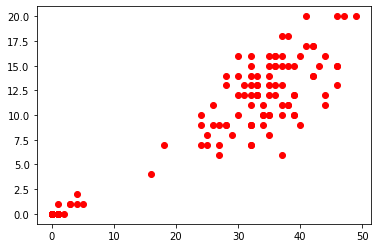

In [56]:
plt.scatter(dates_group.sum()['3PA'], dates_group.sum()['3P'], marker = 'o', color = "red") 

In [80]:
new_df.dtypes

Rk                       int64
G                      float64
Date            datetime64[ns]
Age                     object
Home vs Away            object
Opp                     object
Win/Loss by:            object
GS                      object
3P                     float64
3PA                    float64
3P%                    float64
Time Rested             object
Name                    object
dtype: object

In [115]:

new_df['Time Rested'] = new_df['Time Rested'].replace(to_replace = 9, value = '6+')


In [127]:
new_df.head()

,Rk,G,Date,Age,Home vs Away,Opp,Win/Loss by:,GS,3P,3PA,3P%,Time Rested,Name
0,1,1.0,2017-10-19,28-073,Home,CHI,W (+17),1,0.0,0.0,NaN,N/A,Demar Derozan
1,2,2.0,2017-10-21,28-075,Home,PHI,W (+34),1,0.0,1.0,0.0,2,Demar Derozan
2,3,3.0,2017-10-23,28-077,Away,SAS,L (-4),1,2.0,5.0,0.4,2,Demar Derozan
3,4,4.0,2017-10-25,28-079,Away,GSW,L (-5),1,0.0,0.0,NaN,2,Demar Derozan
4,5,5.0,2017-10-27,28-081,Away,LAL,W (+9),1,0.0,2.0,0.0,2,Demar Derozan


In [128]:
np.arange(2)

array([0, 1])

In [55]:
# Calculate the number of games the raptors made over 12 threes 
dates_group = new_df.groupby(['Date'])

dates_group['3P'].sum() >= 12

dates_group.sum().loc[dates_group.sum()['3P'] >= 12, :]

,Rk,G,3P,3PA,3P%
Date,,,,,
2017-10-19,16,13.0,16.0,35.0,2.833
2017-10-21,35,27.0,15.0,46.0,3.040
2017-11-01,120,86.0,13.0,37.0,5.767
2017-11-03,128,82.0,13.0,33.0,2.829
2017-11-07,170,113.0,14.0,28.0,5.583
2017-11-09,187,132.0,20.0,49.0,4.783
2017-11-14,208,127.0,14.0,30.0,2.703
2017-11-15,238,146.0,16.0,36.0,3.456
2017-11-22,290,182.0,17.0,42.0,3.525


In [122]:
timerested_group = new_df.groupby(['Time Rested'])
timerested_group

In [ ]:
demar['Name'] = "Demar Derozan"
klo['Name'] = "Kyle Lowry"
anunoby['Name'] = "OG Anunoby"
demar_threepoint = demar[['Date', '3P', '3PA', '3P%']]
demar_threepoint
klo_threepoint = klo[['Date', '3P', '3PA', '3P%']]
anunoby_threepoint = anunoby[['Date', "3P", '3PA', '3P%']]

In [37]:
demar_kyle = pd.merge(demar_threepoint, klo_threepoint, on = "Date", suffixes = ("_Demar", "_Kyle"))

In [42]:
pd.merge(demar_kyle, anunoby_threepoint, on="Date", suffixes=("","Anunoby"))

,Date,3P_Demar,3PA_Demar,3P%_Demar,3P_Kyle,3PA_Kyle,3P%_Kyle,3P,3PA,3P%
0,2017-10-19,0.0,0.0,NaN,1.0,3.0,0.333,1.0,3.0,0.333
1,2017-10-21,0.0,1.0,0.00,4.0,10.0,0.400,1.0,2.0,0.500
2,2017-10-23,2.0,5.0,0.40,2.0,8.0,0.250,0.0,2.0,0.000
3,2017-10-25,0.0,0.0,NaN,1.0,8.0,0.125,2.0,4.0,0.500
4,2017-10-27,0.0,2.0,0.00,3.0,7.0,0.429,1.0,3.0,0.333
...,...,...,...,...,...,...,...,...,...,...
77,2018-04-04,3.0,4.0,0.75,2.0,7.0,0.286,0.0,1.0,0.000
78,2018-04-06,0.0,2.0,0.00,3.0,8.0,0.375,0.0,1.0,0.000
79,2018-04-08,NaN,NaN,NaN,1.0,7.0,0.143,5.0,8.0,0.625
80,2018-04-09,2.0,5.0,0.40,3.0,7.0,0.429,2.0,4.0,0.500


In [2]:
number_daysrested_1617 = pd.read_csv("NumberDaysRested/Reg_Number_Days_Off_2016-2017.csv")
number_daysrested_1718 = pd.read_csv("NumberDaysRested/Reg_Number_Days_Off_2017-2018.csv")

In [3]:
threepoints_1617 = number_daysrested_1617 [["DAYS REST","3PM","3PA"]]

In [4]:
threepoints_1718 = number_daysrested_1718[["DAYS REST",'3PM','3PA']]
threepoints_1718

,DAYS REST,3PM,3PA
0,0 Days Rest,12.1,34.0
1,1 Days Rest,11.5,32.7
2,2 Days Rest,12.7,32.5
3,3 Days Rest,12.8,34.8
4,5 Days Rest,13.0,29.0
5,6+ Days Rest,9.0,34.0


In [10]:
pd.merge(threepoints_1617, threepoints_1718, on = 'DAYS REST', suffixes = ("_16-17", "_17-18"))


,DAYS REST,3PM_16-17,3PA_16-17,3PM_17-18,3PA_17-18
0,2 Days Rest,10.1,24.0,12.7,32.5
1,6+ Days Rest,5.0,15.0,9.0,34.0
2,1 Days Rest,8.9,24.7,11.5,32.7
3,0 Days Rest,8.6,25.1,12.1,34.0
4,3 Days Rest,8.0,18.5,12.8,34.8


In [6]:
threepoints_1617['3PM']

0    10.1
1     3.0
2     5.0
3     8.9
4     8.6
5     8.0
Name: 3PM, dtype: float64

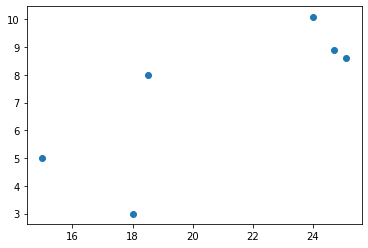

In [9]:
plt.scatter(threepoints_1617['3PA'],threepoints_1617['3PM'], marker='o')

In [32]:
threepoints_1617

,DAYS REST,3PM,3PA
0,2 Days Rest,10.1,24.0
1,4 Days Rest,3.0,18.0
2,6+ Days Rest,5.0,15.0
3,1 Days Rest,8.9,24.7
4,0 Days Rest,8.6,25.1
5,3 Days Rest,8.0,18.5


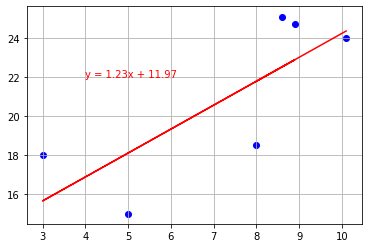

In [31]:
colors = ['b', 'c', 'y', 'm', 'r', 'purple']
a = plt.scatter(threepoints_1617['3PM'],threepoints_1617['3PA'], marker='o', color = colors[0])


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(threepoints_1617['3PM'],threepoints_1617['3PA'])
lin_regress = slope*threepoints_1617['3PM'] + intercept
line_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.plot(threepoints_1617['3PM'], lin_regress, color = 'r')

plt.annotate(line_equation, (4,22), color = 'r')

plt.grid()

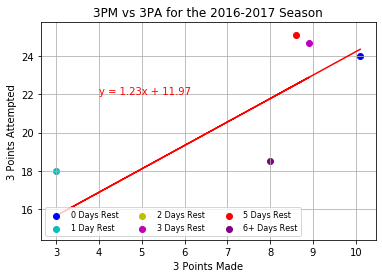

In [29]:

colors = ['b', 'c', 'y', 'm', 'r', 'purple']
a = plt.scatter(threepoints_1617['3PM'][0],threepoints_1617['3PA'][0], marker='o', color = colors[0])
b = plt.scatter(threepoints_1617['3PM'][1],threepoints_1617['3PA'][1], marker='o', color = colors[1])
c = plt.scatter(threepoints_1617['3PM'][2],threepoints_1617['3PA'][2], marker='o', color = colors[2])
d = plt.scatter(threepoints_1617['3PM'][3],threepoints_1617['3PA'][3], marker='o', color = colors[3])
e = plt.scatter(threepoints_1617['3PM'][4],threepoints_1617['3PA'][4], marker='o', color = colors[4])
f = plt.scatter(threepoints_1617['3PM'][5],threepoints_1617['3PA'][5], marker='o', color = colors[5])

plt.legend((a,b,c,d,e,f),
           ('0 Days Rest', '1 Day Rest', '2 Days Rest', '3 Days Rest', '5 Days Rest', '6+ Days Rest'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.xlabel("3 Points Made")
plt.ylabel("3 Points Attempted")
plt.title("3PM vs 3PA for the 2016-2017 Season")


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(threepoints_1617['3PM'],threepoints_1617['3PA'])
lin_regress = slope*threepoints_1617['3PM'] + intercept
line_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.plot(threepoints_1617['3PM'], lin_regress, color = 'r')

plt.annotate(line_equation, (4,22), color = 'r')

plt.grid()


In [79]:
x_axis = [1,2,3,4,5,6]
plt.bar(threepoints_1617['3PM'], threepoints_1617['3PA'], )